In [597]:
#Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.impute import SimpleImputer
from datetime import datetime 
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

In [598]:
# pd.set_option('display.max_columns', None)
df = pd.read_csv('product.csv')
df.head()


,price,Sales Package,Model Number,Part Number,Series,Color,Type,Suitable For,Battery Backup,Power Supply,MS Office Provided,Dedicated Graphic Memory Type,Dedicated Graphic Memory Capacity,Processor Brand,Processor Name,Processor Generation,SSD,SSD Capacity,RAM,RAM Type,Processor Variant,Chipset,Clock Speed,Memory Slots,Expandable Memory,RAM Frequency,Cache,Graphic Processor,Number of Cores,OS Architecture,Operating System,System Architecture,Mic In,RJ45,USB Port,HDMI Port,Hardware Interface,Touchscreen,Screen Size,Screen Resolution,Screen Type,Speakers,Internal Mic,Sound Properties,Refresh Rate,Wireless LAN,Bluetooth,Ethernet,Dimensions,Weight,Disk Drive,Web Camera,Finger Print Sensor,Keyboard,Backlit Keyboard,Pointer Device,Additional Features,Warranty Summary,Warranty Service Type,Covered in Warranty,Not Covered in Warranty,Domestic Warranty,HDD Capacity,RPM,Sound Chip,Lock Port,Model Name,Supported Operating System,Multi Card Slot,Included Software,Battery Cell,Security Chip,TGP,International Warranty,S-video,RJ11,VGA Port,NFC Support,Face Recognition,Laptop Bag,Antivirus,Dock Port,Firewire Port,Read/Write Speed,Wireless WAN,Stylus Included,Other Accessories,Optane Memory,Inbuilt 4G LTE,Recovery Options,EMMC Storage Capacity
0,"61,990","Laptop, Power Adaptor, User Guide, Warranty Documents",15IMH05,81Y401APIN/81Y4017UIN,IdeaPad Gaming 3,Onyx Black,Gaming Laptop,"Gaming, Processing & Multitasking",Upto 8 hours,135 W Slim Tip Adapter,No,GDDR6,4 GB,Intel,Core i5,10th Gen,Yes,512 GB,8 GB,DDR4,10300H,Intel HM470,2.50 GHz with Turbo Boost Upto 4.50 GHz,2 Slots,Upto 16 GB,2933 MHz,8 MB,NVIDIA GeForce GTX 1650,4.0,64 bit,Windows 10 Home,64 bit,Yes,Yes,"1 x USB-C 3.2 (1st Gen), 2 x USB 3.2 (1st Gen)",1x HDMI Port (v2.0),NVMe PCIe,No,39.62 cm (15.6 inch),1920 x 1080 Pixel,"Full HD LED Backlit Anti-glare IPS Display (120Hz Refresh Rate, 250 nits Brightness)",Built-in Dual Speakers,Dual Array Microphone,"1.5 W x 2 Stereo Speakers, Dolby Audio",120 Hz,AX 2x2 (WiFi 6),v5.0,100/1000M,359 x 249.6 x 24.9 mm,2.2 kg,Not Available,720p Webcam (with Privacy Shutter),No,Blue LED Backlit English Keyboard,Yes,Touchpad,"Rapid Charge Technology, Integrated 45Wh Battery, Cooling System with Dual Vents and Dual Action Fans",1 Year Warranty + 1 Year Premium Care + 1 Year ADP,Onsite,"(1) Manufacturer’s warranty against faulty workmanship or defective parts; (2) ADP-Single repair once in year against all Liquid spills, unintentional bump and drops, electric surge, cracks on screen; (3) Premium Care- 24x7 on call support, Software support in case of HDD failure","(1) Any kind of physical damage including electrical surge; (2) No software coverage in warranty; (3) Premium Care & ADP- Not covered in case of Theft, fire, rain, flood and part alteration",1 Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"67,990","Laptop, Power Adaptor, User Guide, Warranty Documents",15ARH05,82B500MMIN||82B500BHIN,Legion 5,Phantom Black,Gaming Laptop,"Gaming, Processing & Multitasking",Upto 7.1 hours,170 W Slim Tip Adapter,No,GDDR6,4 GB,AMD,Ryzen 5 Hexa Core,NaN,Yes,256 GB,8 GB,DDR4,4600H,AMD SoC,3.0 GHz with Turbo Boost Upto 4.0 GHz,2 Slots,Upto 32 GB,3200 MHz,11 MB,NVIDIA GeForce GTX 1650,6.0,64 bit,Windows 10 Home,64 bit,Yes,Yes,"3 x USB 3.2 (1st Gen), 1 x USB 3.2 1st Gen (Always On), 1 x USB-C 3.2 Gen 1 (Support Data Transfer and DisplayPort 1.2)",1x HDMI Port (v2.0),NVMe PCIe,No,39.62 cm (15.6 inch),1920 x 1080 Pixel,"Full HD LED Backlit Anti-glare IPS Display (120Hz Refresh Rate, 45% NTSC Color Gamut, 250 nits Brightness, DC dimmer, 4 Sided Narrow Bezel (Active Area 84%))",Built-in Dual Speakers,Dual Array Microphone,"2W x 2 Stereo Speakers, Dolby Atmos for Gaming, HARMAN-branded Speakers",120 Hz,AX 2x2 (WiFi 6),v5.0,100/1000M,363.06 x 259.61 x 24 mm,2.3 kg,Not Available,720p Webcam (with Privacy Shutter),No,"White Backlit, English Keyboard",Yes,Touchpad,"Integrated 60Wh Battery, Lenovo Q-Control

In [599]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 91 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   price                              1003 non-null   object 
 1   Sales Package                      1003 non-null   object 
 2   Model Number                       1003 non-null   object 
 3   Part Number                        1003 non-null   object 
 4   Series                             858 non-null    object 
 5   Color                              1003 non-null   object 
 6   Type                               1003 non-null   object 
 7   Suitable For                       1003 non-null   object 
 8   Battery Backup                     619 non-null    object 
 9   Power Supply                       621 non-null    object 
 10  MS Office Provided                 996 non-null    object 
 11  Dedicated Graphic Memory Type      532 non-null    objec

In [600]:
# data=df[['price','Color','Type','Suitable For','Battery Backup','Power Supply','MS Office Provided','Dedicated Graphic Memory Capacity','Processor Brand','Processor Name','Processor Generation'\
#    ,'SSD' ,'SSD Capacity','RAM','RAM Type','Processor Variant','Clock Speed','Graphic Processor','Number of Cores','Operating System','Mic In','Screen Size','Screen Resolution','Speakers','Internal Mic'\
#     ,'Weight','Finger Print Sensor','Backlit Keyboard']]
# data.info()

In [601]:
count_null=df.isnull().sum(axis = 0)
index=[]
for i in range(len(count_null)):
    if count_null[i]>100:
        index.append(i)
df.drop(df.columns[index],axis=1,inplace=True)


In [602]:
df.drop(['Graphic Processor','Suitable For','Sales Package','Model Number','Dimensions','Part Number','USB Port','Covered in Warranty','Not Covered in Warranty','Keyboard','Web Camera','Warranty Summary','Screen Type','Speakers','Wireless LAN','Warranty Service Type'],axis=1,inplace=True)

df = df[df['price'].notna()]
df['price'] = df['price'].str.replace(',', '')
df = df.astype({'price':'float'})

map={'Yes':1,'No':0}
df['MS Office Provided'] = df['MS Office Provided'].map(map)
df['SSD'] = df['SSD'].map(map)

df['Touchscreen'] = df['Touchscreen'].map(map)
df['RAM'] = pd.to_numeric(df['RAM'].astype(str).str[:-2], errors='coerce')
# df['SSD Capacity'] = pd.to_numeric(df['SSD Capacity'].astype(str).str[:-2], errors='coerce')
df['SSD Capacity'] =df['SSD Capacity'].str.extract('(^\d*)').astype(float)
df['SSD Capacity'] = df['SSD Capacity'].replace(1, 1024)
df['SSD Capacity'] = df['SSD Capacity'].replace(2, 2048)
df['Bluetooth'] =df['Bluetooth'].str.extract('(\d+\.\d+)').astype(float)
df['Screen Size'] =df['Screen Size'].str.extract('(\d+\.\d+)').astype(float)
df['Screen Resolution'] =df['Screen Resolution'].str.extract('(^\d*)').astype(float)
df['Clock Speed'] =df['Clock Speed'].str.extract('(\d+\.\d+)').astype(float)
df['Weight'] = pd.to_numeric(df['Weight'].astype(str).str[:-2], errors='coerce')
print(df.shape)
df.head()


(1003, 18)


,price,Color,Type,MS Office Provided,Processor Brand,Processor Name,SSD,SSD Capacity,RAM,RAM Type,Clock Speed,Operating System,Touchscreen,Screen Size,Screen Resolution,Bluetooth,Weight,Disk Drive
0,61990.0,Onyx Black,Gaming Laptop,0.0,Intel,Core i5,1,512.0,8,DDR4,2.5,Windows 10 Home,0,39.62,1920.0,5.0,2.20,Not Available
1,67990.0,Phantom Black,Gaming Laptop,0.0,AMD,Ryzen 5 Hexa Core,1,256.0,8,DDR4,3.0,Windows 10 Home,0,39.62,1920.0,5.0,2.30,Not Available
2,34990.0,Platinum Grey,Thin and Light Laptop,1.0,Intel,Core i3,1,256.0,8,DDR4,4.1,Windows 11 Home,0,39.62,1920.0,5.0,2.38,Not Available
3,41990.0,Natural Silver,Thin and Light Laptop,1.0,Intel,Core i3,1,512.0,8,DDR4,1.7,Windows 11 Home,0,39.62,1920.0,5.0,1.69,Not Available
4,38990.0,Natural Silver,Thin and Light Laptop,1.0,Intel,Core i3,1,256.0,8,DDR4,1.7,Windows 11 Home,0,35.56,1920.0,5.0,1.46,Not Available


In [603]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1007
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               1003 non-null   float64
 1   Color               1003 non-null   object 
 2   Type                1003 non-null   object 
 3   MS Office Provided  996 non-null    float64
 4   Processor Brand     1003 non-null   object 
 5   Processor Name      1003 non-null   object 
 6   SSD                 1003 non-null   int64  
 7   SSD Capacity        927 non-null    float64
 8   RAM                 1003 non-null   int64  
 9   RAM Type            1003 non-null   object 
 10  Clock Speed         867 non-null    float64
 11  Operating System    1003 non-null   object 
 12  Touchscreen         1003 non-null   int64  
 13  Screen Size         1003 non-null   float64
 14  Screen Resolution   1003 non-null   float64
 15  Bluetooth           944 non-null    float64
 16  Weight

In [604]:
df['SSD Capacity'].value_counts()

512.0     447
256.0     271
1024.0    194
128.0      12
2048.0      3
Name: SSD Capacity, dtype: int64

In [605]:
df.nunique()

price                 335
Color                 115
Type                    9
MS Office Provided      2
Processor Brand         4
Processor Name         27
SSD                     2
SSD Capacity            5
RAM                     5
RAM Type                8
Clock Speed            39
Operating System       11
Touchscreen             2
Screen Size            15
Screen Resolution      14
Bluetooth               7
Weight                 92
Disk Drive              3
dtype: int64

In [606]:
response_corr_abs = np.abs(df.corr()['price']).sort_values(ascending=False)[1:]
response_corr = df.corr()['price'].sort_values(ascending=False)[1:]
print("Tương quan giữa các đặc trưng so với 'price'")
print('--------------------------------------------------------')
print(response_corr)

Tương quan giữa các đặc trưng so với 'price'
--------------------------------------------------------
RAM                   0.759464
SSD Capacity          0.688429
Screen Resolution     0.454485
Bluetooth             0.300267
Clock Speed           0.292598
SSD                   0.235050
Weight                0.228240
Touchscreen           0.139522
Screen Size           0.085743
MS Office Provided   -0.167903
Name: price, dtype: float64


<AxesSubplot:>

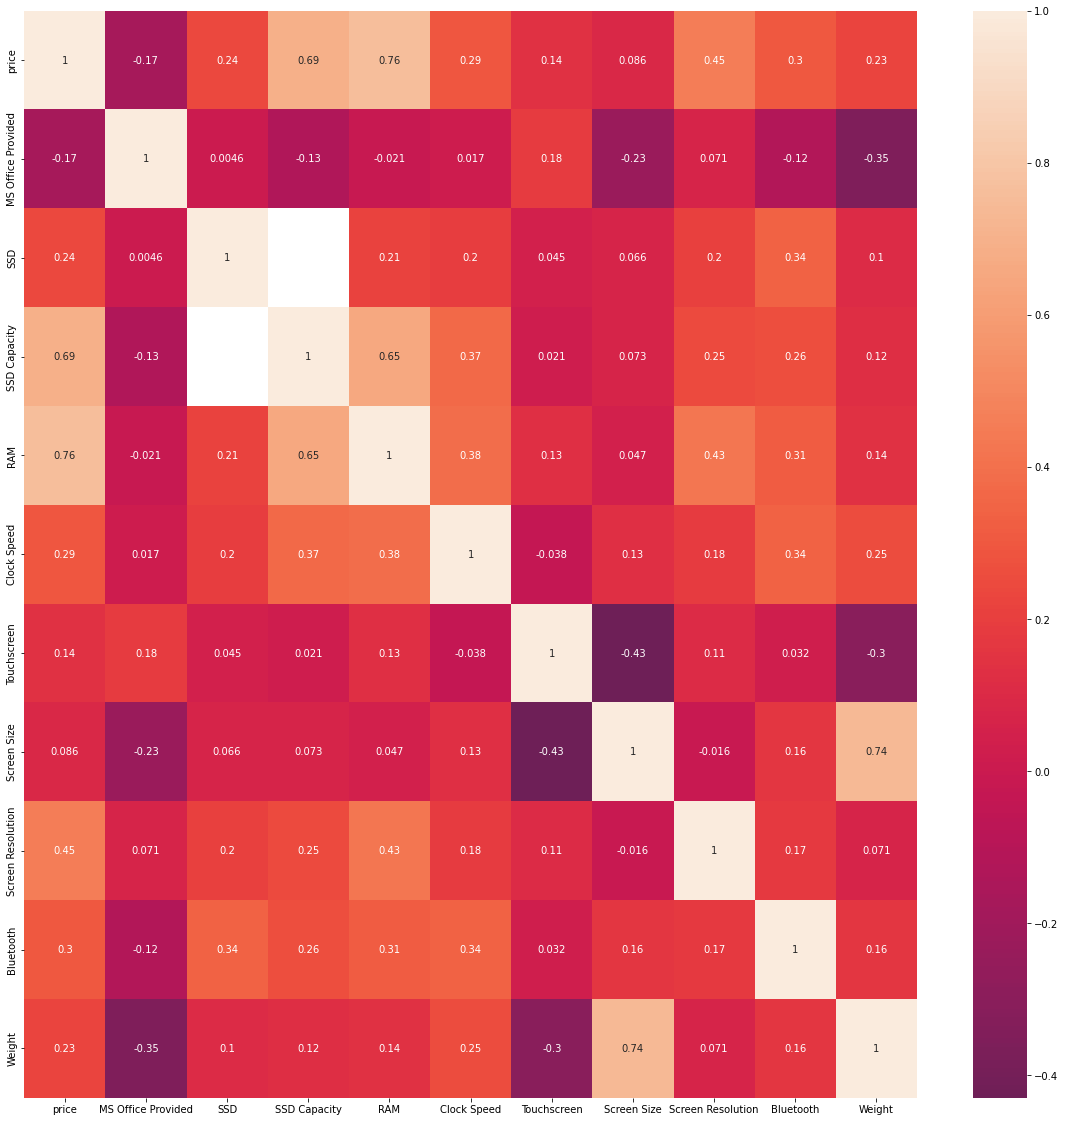

In [607]:
plt.figure(figsize=(20,20))
cmap = sns.color_palette("rocket", as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap=cmap, center=0)

In [608]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1007
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               1003 non-null   float64
 1   Color               1003 non-null   object 
 2   Type                1003 non-null   object 
 3   MS Office Provided  996 non-null    float64
 4   Processor Brand     1003 non-null   object 
 5   Processor Name      1003 non-null   object 
 6   SSD                 1003 non-null   int64  
 7   SSD Capacity        927 non-null    float64
 8   RAM                 1003 non-null   int64  
 9   RAM Type            1003 non-null   object 
 10  Clock Speed         867 non-null    float64
 11  Operating System    1003 non-null   object 
 12  Touchscreen         1003 non-null   int64  
 13  Screen Size         1003 non-null   float64
 14  Screen Resolution   1003 non-null   float64
 15  Bluetooth           944 non-null    float64
 16  Weight

In [609]:
def Missing_values(col):
    random_samples = df[col].dropna().sample(n=df[col].isnull().sum(),random_state=0)
    random_samples  
    random_samples.index = df[df[col].isnull()].index
    df[col]=df[col]
    df.loc[df[col].isnull(), col]=random_samples
df['SSD Capacity']=df['SSD Capacity'].fillna(0)
Missing_values('Bluetooth')
Missing_values('Weight')
Missing_values('Clock Speed')
Missing_values('MS Office Provided')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1007
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               1003 non-null   float64
 1   Color               1003 non-null   object 
 2   Type                1003 non-null   object 
 3   MS Office Provided  1003 non-null   float64
 4   Processor Brand     1003 non-null   object 
 5   Processor Name      1003 non-null   object 
 6   SSD                 1003 non-null   int64  
 7   SSD Capacity        1003 non-null   float64
 8   RAM                 1003 non-null   int64  
 9   RAM Type            1003 non-null   object 
 10  Clock Speed         1003 non-null   float64
 11  Operating System    1003 non-null   object 
 12  Touchscreen         1003 non-null   int64  
 13  Screen Size         1003 non-null   float64
 14  Screen Resolution   1003 non-null   float64
 15  Bluetooth           1003 non-null   float64
 16  Weight

In [610]:
df.head()

,price,Color,Type,MS Office Provided,Processor Brand,Processor Name,SSD,SSD Capacity,RAM,RAM Type,Clock Speed,Operating System,Touchscreen,Screen Size,Screen Resolution,Bluetooth,Weight,Disk Drive
0,61990.0,Onyx Black,Gaming Laptop,0.0,Intel,Core i5,1,512.0,8,DDR4,2.5,Windows 10 Home,0,39.62,1920.0,5.0,2.20,Not Available
1,67990.0,Phantom Black,Gaming Laptop,0.0,AMD,Ryzen 5 Hexa Core,1,256.0,8,DDR4,3.0,Windows 10 Home,0,39.62,1920.0,5.0,2.30,Not Available
2,34990.0,Platinum Grey,Thin and Light Laptop,1.0,Intel,Core i3,1,256.0,8,DDR4,4.1,Windows 11 Home,0,39.62,1920.0,5.0,2.38,Not Available
3,41990.0,Natural Silver,Thin and Light Laptop,1.0,Intel,Core i3,1,512.0,8,DDR4,1.7,Windows 11 Home,0,39.62,1920.0,5.0,1.69,Not Available
4,38990.0,Natural Silver,Thin and Light Laptop,1.0,Intel,Core i3,1,256.0,8,DDR4,1.7,Windows 11 Home,0,35.56,1920.0,5.0,1.46,Not Available


Text(0.5, 1.0, 'Likes')

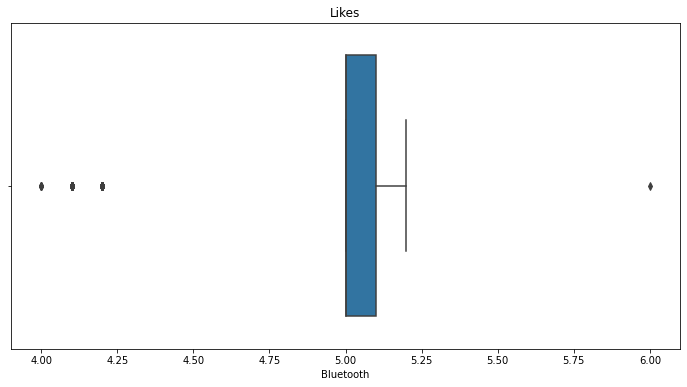

In [611]:
#boxplot of likes
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Bluetooth'], data=df)
plt.title('Likes')

In [612]:
df.to_csv('product_clean.csv',index=False)